In [1]:
#healthcare-dataset-stroke-data

# STROKE PREDICTOR


## AIM 

To classify / predict whether a patient can suffer a stroke.

To use various algorithm applicable to this categorical data and to explain there performances

It is a binary classification problem with multiple numerical and categorical features.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from sklearn.metrics import roc_curve, auc

from pandas.plotting import scatter_matrix
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score

from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.metrics import mean_squared_error, r2_score


import imblearn


ModuleNotFoundError: No module named 'imblearn'

In [ ]:
import sklearn
print(sklearn.__version__)

In [ ]:
#This is to import data from the dataset

df= pd.read_csv('healthcare-dataset-stroke-data.csv')

In [5]:
#This is to check the first 10 head of the data
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [6]:
#This is to output the dimension of a dataFrame
print(df.shape)

(5110, 12)


### Description of the Features and key words with their data Types

|Variable | Description| Data Type|
|--------------|-----------|---------|
| id | Unique identifier for each patient|Integer/Alphanumeric|
|gender|	Categorical variable indicating gender ("Male", "Female", or "Other")	|String|
|age	|Numeric variable representing the age of the patient	|Integer/Float|
|hypertension	|Binary variable (0 or 1) indicating whether the patient has hypertension (1 if yes, 0 if no)	|Integer|
|heart_disease	|Binary variable (0 or 1) indicating whether the patient has a heart disease (1 if yes, 0 if no)	|Integer|
|ever_married	|Categorical variable indicating whether the patient has ever been married ("Yes" or "No")	|String|
|work_type	|Categorical variable describing the type of work the patient is involved in ("children", "Govt_jov", "Never_worked", "Private", or "Self-employed")	|String|
|Residence_type	|Categorical variable indicating the residence type of the patient ("Rural" or "Urban")	|String|
|avg_glucose_level	|Numeric variable representing the average glucose level in the patient's blood	|Float|
|bmi	|Numeric variable representing the body mass index of the patient	|Float|
|smoking_status	|Categorical variable describing the smoking status of the patient ("formerly smoked", "never smoked", "smokes", or "Unknown")	|String|
|stroke	|Binary variable (0 or 1) indicating whether the patient had a stroke (1 if yes, 0 if no)	|Integer|

In [7]:
#This is to drop the id column it is not needed for the scope of this study
df = df.drop('id',axis=1) 

### Justification

The id is not needed in this scope of study

In [8]:
#This is to check the first 10 head of the data to confirm the id has been droped
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [9]:
#This is to check the last ten lines of the dataframe
df.tail(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5100,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5101,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5102,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [10]:
#This is to output the dimension of a dataFrame
print(df.shape)

(5110, 11)


In [11]:
#this is to show the descriptive statistics of the numerical columns of this dataFrame
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [12]:
#this is to get the information of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB
None


# Data Cleaning

In [13]:
# This is to count the number of missing values in each column and print the total
CountValueMissing = df.isnull().sum()

# Print the missing value
print(CountValueMissing)

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [14]:
#We need to check the percentage of the missing data
percentage_null= df.isnull().sum()*100 / len(df) 

#arranging it in ascending order
percentage_null.sort_values(ascending=False)

bmi                  3.933464
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [15]:
#this is to get the information of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB
None


In [16]:
#Show the rows where there are missing values
df[df.isnull().any(axis = 1)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5039,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [17]:
#Check if there are dupplicate values
df.duplicated().sum()


0

### Justification

I will be droping the missing value because i have only 3.9% of missing values which is still minute to the data i have.

In [18]:
#This is to delete the missing values in bmi
label_encode_this = LabelEncoder()


def clean_data(df):
    
    df = df.dropna(axis = 0)
    return df
data_clean = clean_data(df)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [19]:
#this is to get the information of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB
None


In [20]:
#This is to use LabelEncoder to transform categorical columns:gender, ever_married, work_type,Residence_type, smoking_status'
#This is because they are all ordinal variables

label_encode_this = LabelEncoder()
def clean_data(df):
    
    df.dropna(axis = 0, inplace = True)
    
    df['gender'] = label_encode_this.fit_transform(df['gender'])
    df['ever_married'] = label_encode_this.fit_transform(df['ever_married'])
    df['work_type'] = label_encode_this.fit_transform(df['work_type'])
    df['Residence_type'] = label_encode_this.fit_transform(df['Residence_type'])
    df['smoking_status'] = label_encode_this.fit_transform(df['smoking_status'])
    
    return df
data_clean = clean_data(df)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   int32  
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   int32  
 5   work_type          4909 non-null   int32  
 6   Residence_type     4909 non-null   int32  
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   int32  
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 364.3 KB


In [21]:
#This is to check the first 10 head of the data to confirm the id has been droped
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
6,1,74.0,1,1,1,2,0,70.09,27.4,2,1
7,0,69.0,0,0,0,2,1,94.39,22.8,2,1
9,0,78.0,0,0,1,2,1,58.57,24.2,0,1
10,0,81.0,1,0,1,2,0,80.43,29.7,2,1
11,0,61.0,0,1,1,0,0,120.46,36.8,3,1


In [22]:
# This is to count the number of missing values in each column and print the total
CountValueMissing = df.isnull().sum()

# Print the missing value
print(CountValueMissing)


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


# Data Visualization

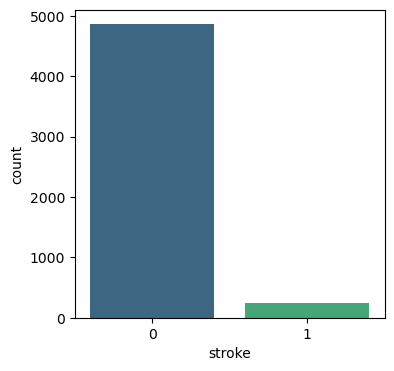

In [5]:
#This code creates a count plot to visualize the distribution of the 'stroke' variable

plt.figure(figsize = (4,4))
sns.countplot(x = 'stroke', data = df, palette = 'viridis')
plt.show()

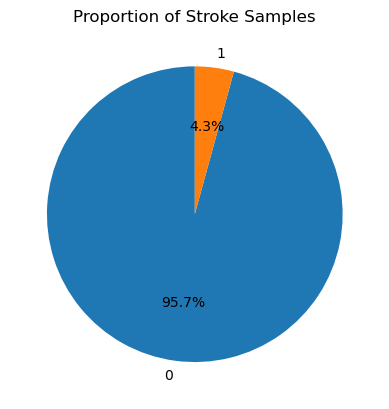

In [24]:
s_data = df['stroke'].value_counts()

# Plotting the pie chart
plt.pie(s_data, labels=s_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Stroke Samples')
plt.show()

This is clearly shown that we have a very unbalance dataset in favour of people with no storke

Due to this large unbalance and bias, the prediction cannot be trusted.

There is need to work on the inbalance. I will address it later with SMOTE oversampling

#### Categorical Data Distribution

In [25]:
print(df.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   int32  
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   int32  
 5   work_type          4909 non-null   int32  
 6   Residence_type     4909 non-null   int32  
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   int32  
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 364.3 KB


In [27]:

col = list(df.columns)
categorical_features = []
discrete_features = []
for i in col:
    if len(df[i].unique()) > 6:
        discrete_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Discrete Features :',*discrete_features)


dfcopy = df.copy(deep = True)

Categorical Features : gender hypertension heart_disease ever_married work_type Residence_type smoking_status stroke
Discrete Features : age avg_glucose_level bmi


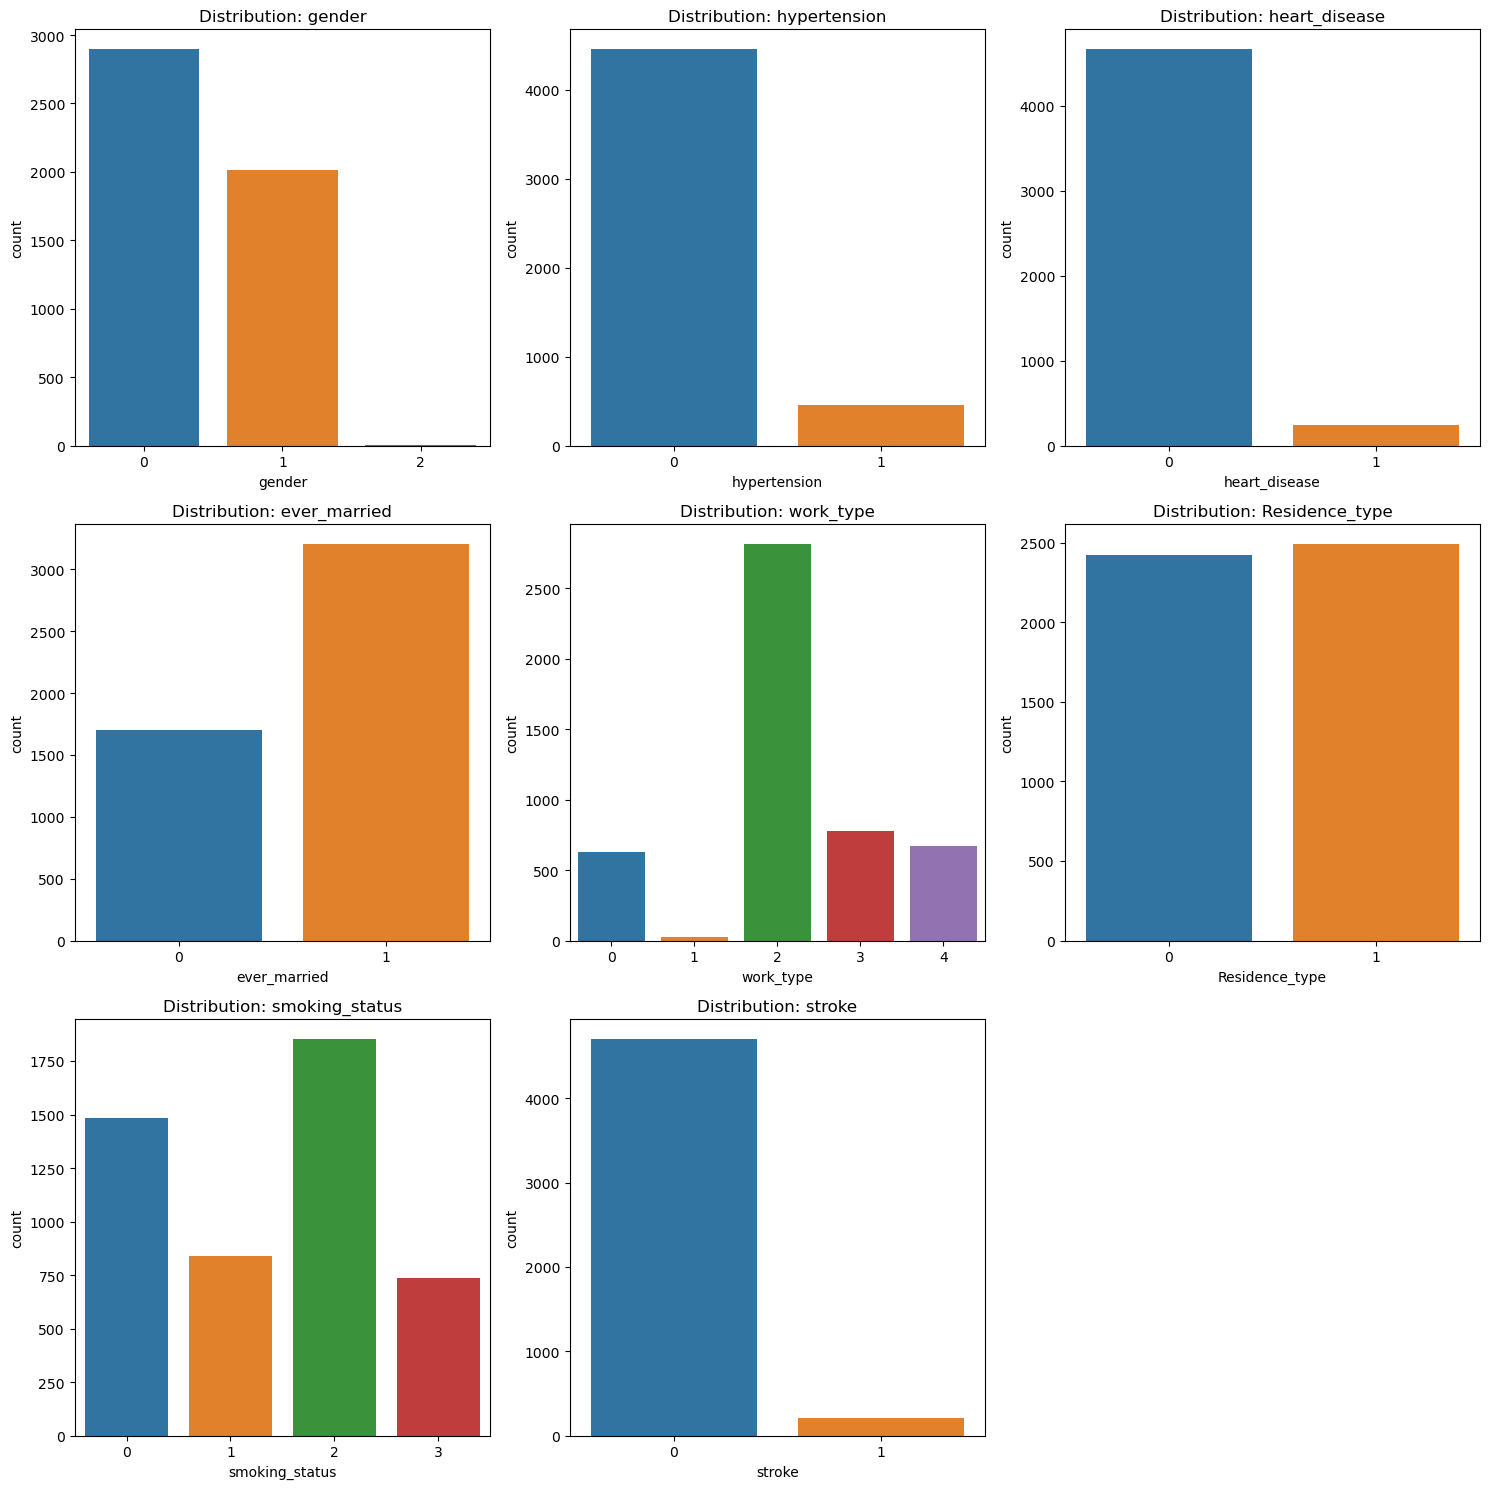

In [28]:
# Calculate the number of rows and columns for subplots
num_rows = (len(categorical_features) - 1) // 3 + 1
num_cols = min(len(categorical_features), 3)

# Create subplots
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

# Loop through categorical features and plot countplots
for i, feature in enumerate(categorical_features):
    row = i // num_cols
    col = i % num_cols
    sns.countplot(x=feature, data=dfcopy, ax=ax[row, col])
    title = 'Distribution: ' + feature
    ax[row, col].set_title(title)

# Remove empty plot space
for i in range(len(categorical_features), num_rows * num_cols):
    fig.delaxes(ax.flatten()[i])

plt.tight_layout()
plt.show()

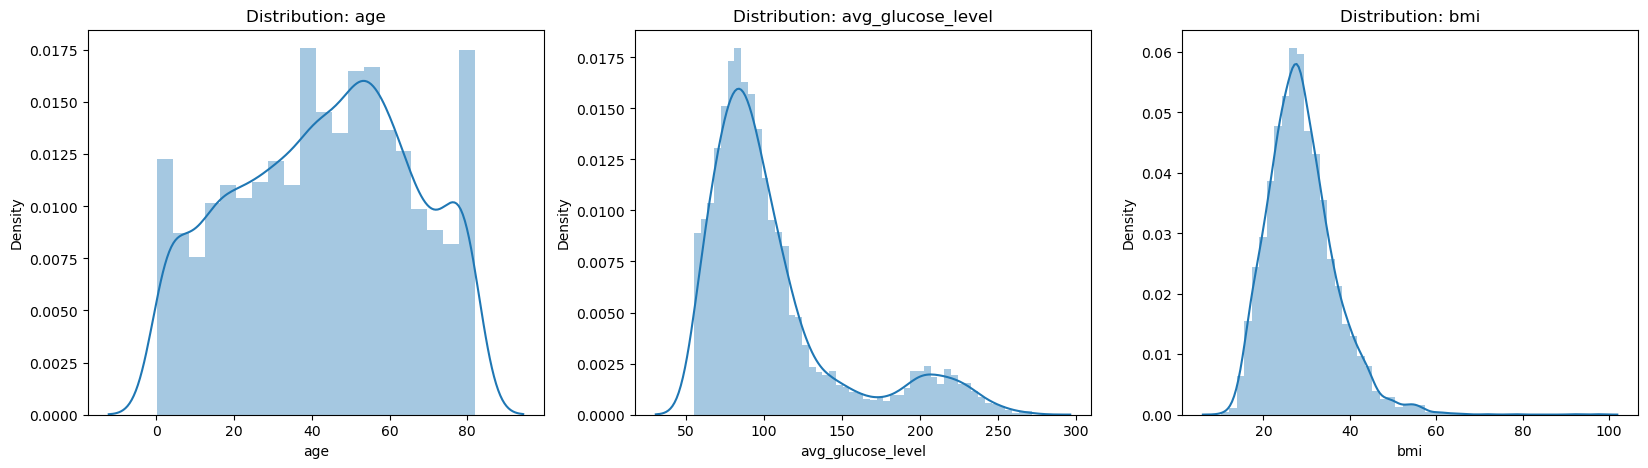

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

for i in range(len(discrete_features)):
    sns.distplot(dfcopy[discrete_features[i]], ax=ax[i])
    title = 'Distribution: ' + discrete_features[i]
    ax[i].set_title(title)

plt.show()

In [30]:
#Show the mean mode and median of the numerical features
numerical = ['age','avg_glucose_level', 'bmi']
df[numerical].describe()

,age,avg_glucose_level,bmi
count,4909.000000,4909.000000,4909.000000
mean,42.865374,105.305150,28.893237
std,22.555115,44.424341,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.070000,23.500000
50%,44.000000,91.680000,28.100000
75%,60.000000,113.570000,33.100000
max,82.000000,271.740000,97.600000


In [31]:
#Show the mean mode and median of the categorical features
categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
'work_type', 'Residence_type', 'smoking_status']

df[categorical].describe()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,0.410063,0.091872,0.049501,0.652679,2.170096,0.507232,1.375433
std,0.492309,0.288875,0.216934,0.476167,1.092593,0.499999,1.067322
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,2.000000
75%,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,2.000000
max,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,3.000000


### Justification

In [32]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


## Data Normalization / Standardization

We will use MinMax scaling

Min-Max scaling Standardisation (mean-0, sigma-1)

In [33]:
scaler = MinMaxScaler()

# Apply scaler() to all the columns with numerical values except the '1, 0' and  variables (categorical values)
numerical_values = ['age', 'work_type', 'avg_glucose_level', 'bmi', 'smoking_status',]

df[numerical_values] = scaler.fit_transform(df[numerical_values])

In [34]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.816895,0,1,1,0.50,1,0.801265,0.301260,0.333333,1
2,1,0.975586,0,1,1,0.50,0,0.234512,0.254296,0.666667,1
3,0,0.597168,0,0,1,0.50,1,0.536008,0.276060,1.000000,1
4,0,0.963379,1,0,1,0.75,0,0.549349,0.156930,0.666667,1
5,1,0.987793,0,0,1,0.50,1,0.605161,0.214204,0.333333,1


### Further visualization


#### Hypertention to stroke

A person with hypertension has a probability of 13.3 % get a stroke

A person without hypertension has a probability of  3.34 % get a stroke


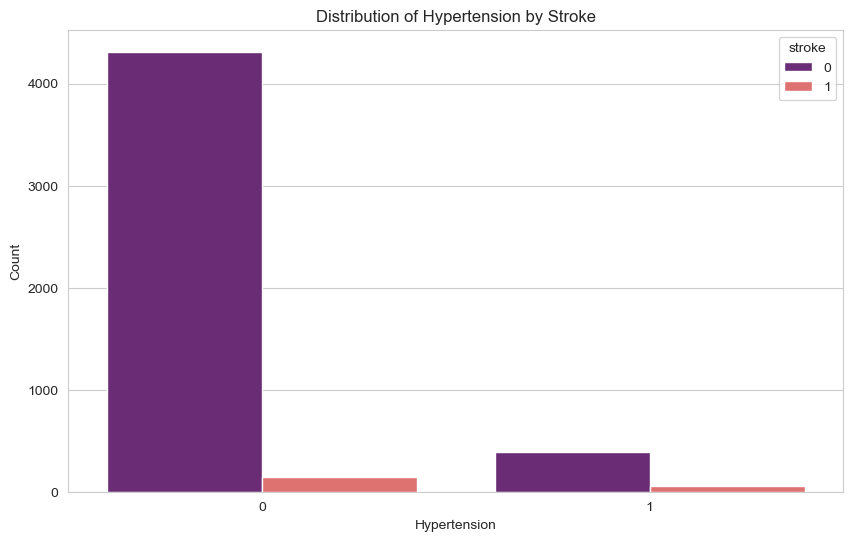

In [35]:
print (f'A person with hypertension has a probability of {round(df[df["hypertension"]==1]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person without hypertension has a probability of  {round(df[df["hypertension"]==0]["stroke"].mean()*100,2)} % get a stroke')



# Set the style of the seaborn
sns.set_style("whitegrid")

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the count of 'hypertension' with 'stroke' as hue using Seaborn's countplot
sns.countplot(data=df, x='hypertension', hue='stroke', palette='magma', ax=ax)

# Set labels and title
ax.set_xlabel('Hypertension')
ax.set_ylabel('Count')
ax.set_title('Distribution of Hypertension by Stroke')

# Show the plot
plt.show()

#### Heart Disease to Stroke probability

A person with heart disease has a probability of 16.46 % get a stroke

A person without heart disease has a probability of 3.62 % get a stroke


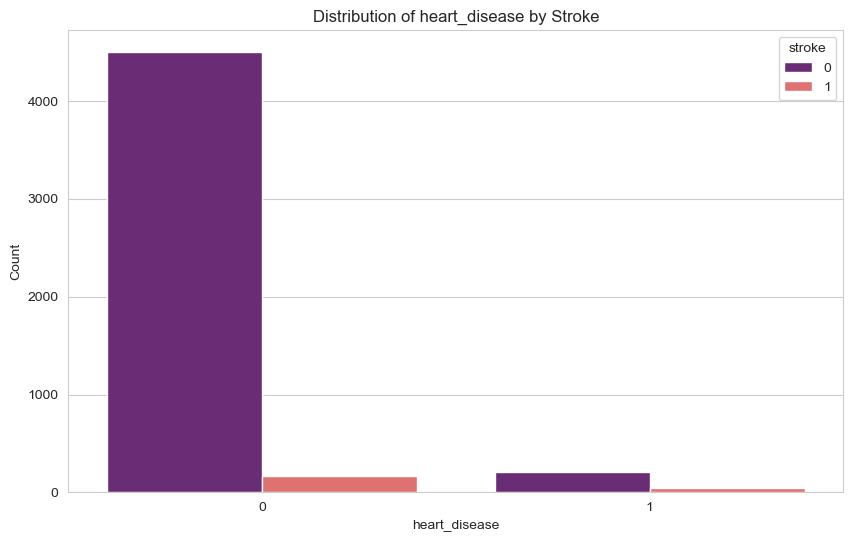

In [36]:
print (f'A person with heart disease has a probability of {round(df[df["heart_disease"]==1]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person without heart disease has a probability of {round(df[df["heart_disease"]==0]["stroke"].mean()*100,2)} % get a stroke')

# Set the style of the seaborn
sns.set_style("whitegrid")

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the count of 'heart_disease' with 'stroke' as hue using Seaborn's countplot
sns.countplot(data=df, x='heart_disease', hue='stroke', palette='magma', ax=ax)

# Set labels and title
ax.set_xlabel('heart_disease')
ax.set_ylabel('Count')
ax.set_title('Distribution of heart_disease by Stroke')

# Show the plot
plt.show()

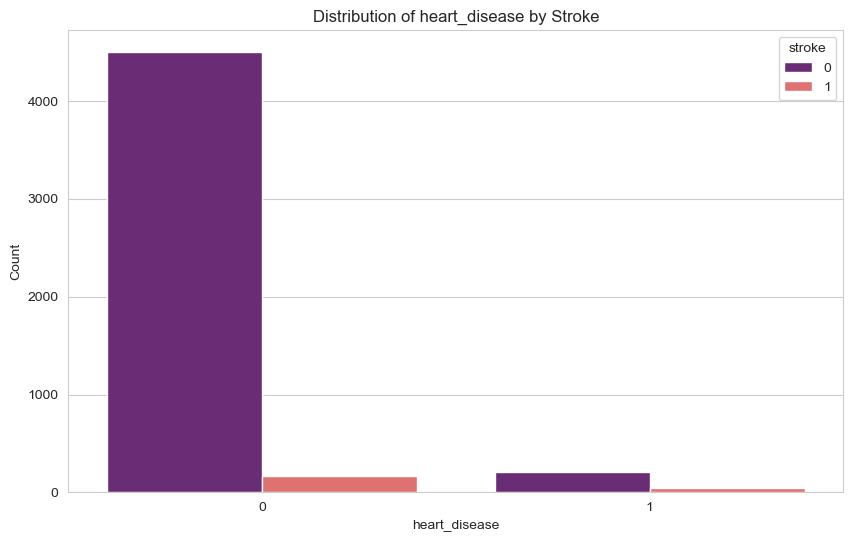

In [37]:
# Set the style of the seaborn
sns.set_style("whitegrid")

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the count of 'heart_disease' with 'stroke' as hue using Seaborn's countplot
sns.countplot(data=df, x='heart_disease', hue='stroke', palette='magma', ax=ax)

# Set labels and title
ax.set_xlabel('heart_disease')
ax.set_ylabel('Count')
ax.set_title('Distribution of heart_disease by Stroke')

# Show the plot
plt.show()


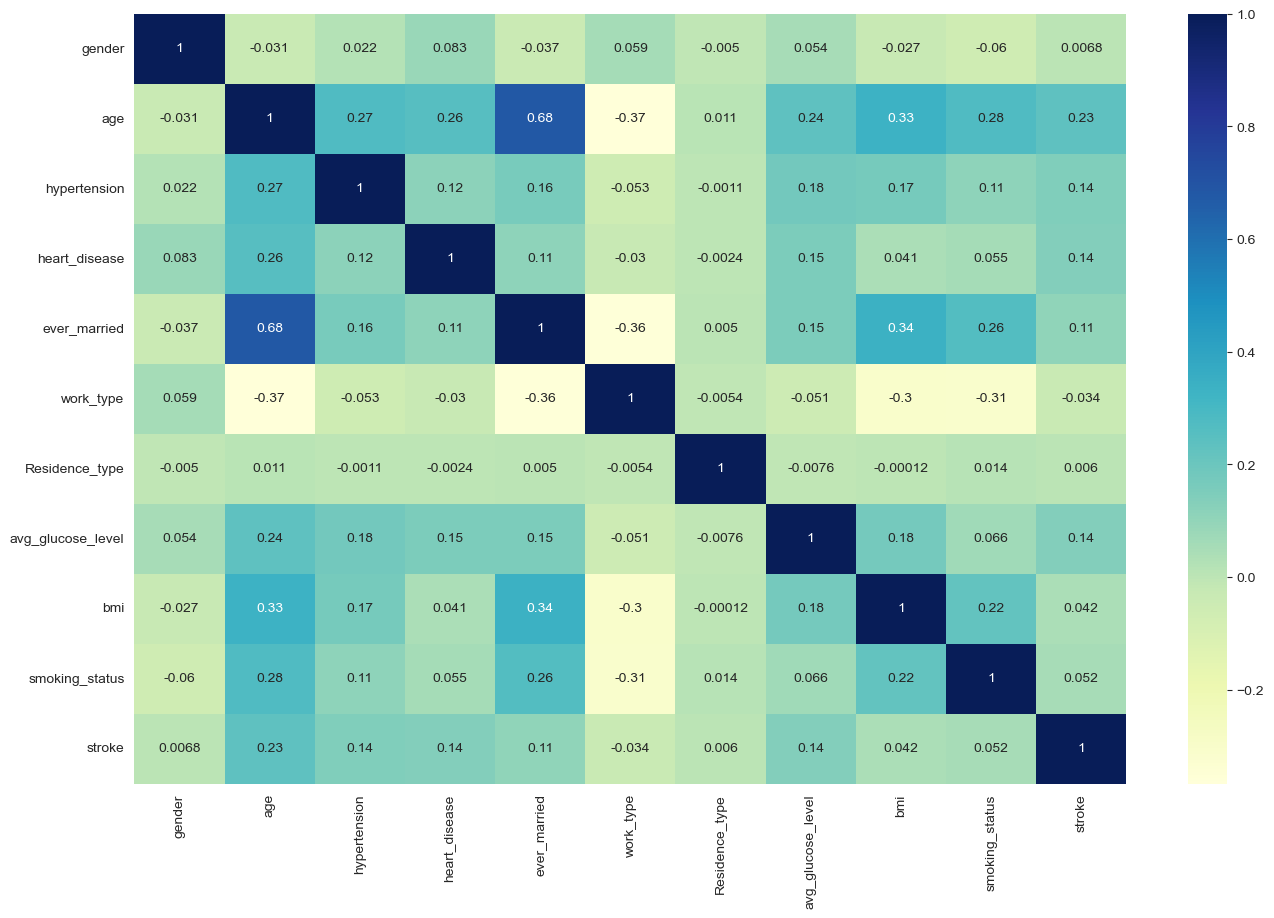

In [38]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### From the correlation matrix

Age and target variable weak positive relationship (0.23).

Average glucose level's mean scores on the target have differences between a person who has a stroke or not. But this differences are small. (0.14)

BMI does not have any significant relationship with the target variable.

A person with hypertension are almost 3.98 time more likely to get stroke than the ones who don't have hypertension.

A person with heart disease are 4.54 times more likely to get stroke than the ones who don't have heart disease.

As it shows, Age seems to be more correlated to ever_married

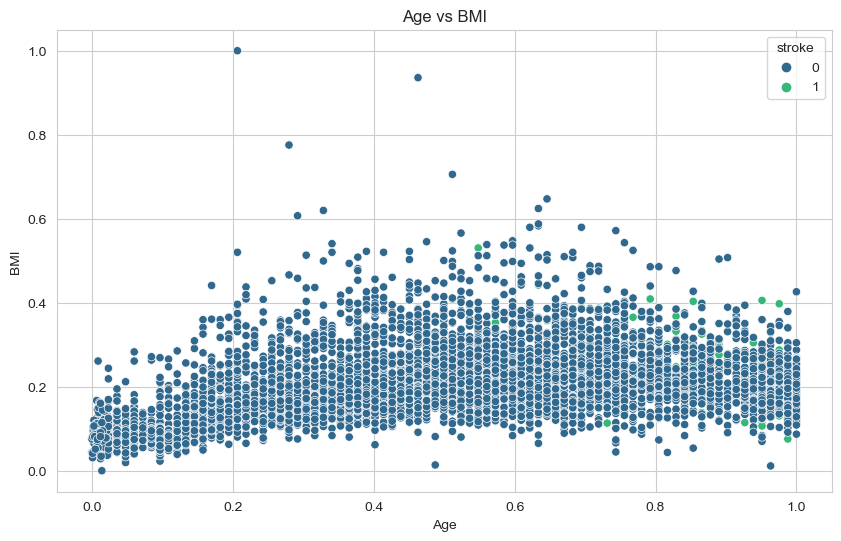

In [39]:
# Plotting the scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='bmi', hue='stroke', palette='viridis')
plt.title('Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

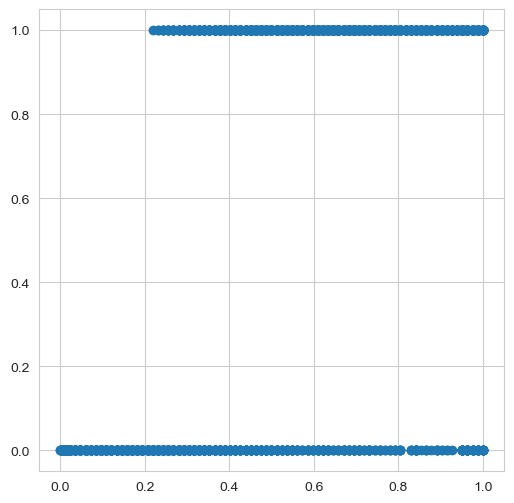

In [40]:
#pairplot for age vs ever_married
plt.figure(figsize=[6,6])
plt.scatter(df.age, df.ever_married)
plt.show()

### Define X and y

In [41]:
X=df.drop(columns=['ever_married','stroke'],axis=1)
Y=df["stroke"]
X.head(10)

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,0.816895,0,1,0.50,1,0.801265,0.301260,0.333333
2,1,0.975586,0,1,0.50,0,0.234512,0.254296,0.666667
3,0,0.597168,0,0,0.50,1,0.536008,0.276060,1.000000
4,0,0.963379,1,0,0.75,0,0.549349,0.156930,0.666667
5,1,0.987793,0,0,0.50,1,0.605161,0.214204,0.333333
6,1,0.902344,1,1,0.50,0,0.069107,0.195876,0.666667
7,0,0.841309,0,0,0.50,1,0.181285,0.143184,0.666667
9,0,0.951172,0,0,0.50,1,0.015927,0.159221,0.000000
10,0,0.987793,1,0,0.50,0,0.116841,0.222222,0.666667
11,0,0.743652,0,1,0.00,0,0.301634,0.303551,1.000000


### Split the data into  Train set and Test set  from sklearn

In [42]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(4909, 9) (3927, 9) (982, 9)


### Predicting the test set

### Evaluating the Model

In [43]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(4909, 9) (3927, 9) (982, 9)


Due to the unbalance dataset in favour of people with no storke against those with stroke, we will oversample using SMOTE (Synthetic Minority Oversampling TEchnique) for the minority which is those with stroke to balance the dataset

##  *Addressing Inbalance*

### Justification

I want to apply the Synthetic Minority Over-sampling Technique (SMOTE) to balance the class distribution in the training set by initializes the SMOTE object with a random state of 2. Setting the random state ensures reproducibility of the oversampling process also by using SMOTE algorithm to the training data.

in addition, it generates synthetic samples for the minority class (class '1' i.e the positive patients in this case) to balance the class distribution. The fit_resample method returns the oversampled feature matrix (X_train_new) and the corresponding target labels (Y_train_new).

### OverSampling

In [44]:
#Print the number of the Y train when stroke is positive "1"  and when stroke is negative "0" before oversampling
print("Before OverSampling, this is the number of Positive patients '1': {}".format(sum(Y_train==1)))
print("Before OverSampling, this is the number of Negative patients '0': {} \n".format(sum(Y_train==0)))

Before OverSampling, this is the number of Positive patients '1': 167
Before OverSampling, this is the number of Negative patients '0': 3760 



In [45]:
#Initialise the SMOTE object with random state of 2 and use the SMOTE algorithm to the training data
smote = SMOTE(random_state=2)
X_train_new, Y_train_new = smote.fit_resample(X_train, Y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_new.shape))
print('After OverSampling, the shape of train_Y: {} \n'.format(Y_train_new.shape))

print("After OverSampling, Positive patients '1': {}".format(sum(Y_train_new==1)))
print("After OverSampling, Negative patients '0': {}".format(sum(Y_train_new==0)))

After OverSampling, the shape of train_X: (7520, 9)
After OverSampling, the shape of train_Y: (7520,) 

After OverSampling, Positive patients '1': 3760
After OverSampling, Negative patients '0': 3760


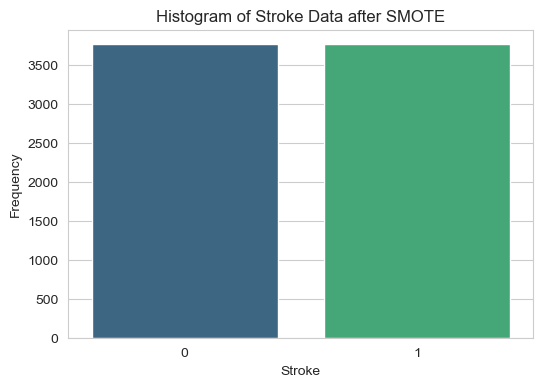

In [46]:
# Set the style and context for Seaborn
sns.set_style("whitegrid")

# Create a countplot for the stroke data after SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=Y_train_new, palette='viridis')
plt.xlabel('Stroke')
plt.ylabel('Frequency')
plt.title('Histogram of Stroke Data after SMOTE')
plt.show()

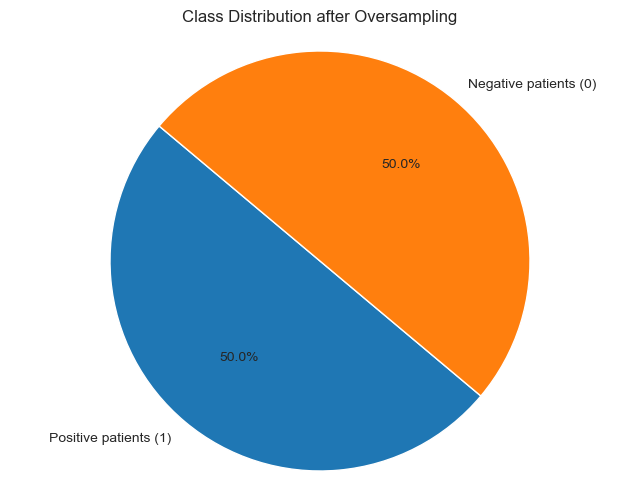

In [47]:

# Define the counts of each class
positive_count = sum(Y_train_new == 1)
negative_count = sum(Y_train_new == 0)

# Create a pie chart
plt.figure(figsize=(8, 6))
labels = ['Positive patients (1)', 'Negative patients (0)']
sizes = [positive_count, negative_count]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution after Oversampling')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Spliting the data into train and test

This code splits the resampled dataset obtained after SMOTE application into training and testing sets, maintaining a 20% allocation for testing. The stratification process ensures that the class distribution remains consistent across both sets. By printing the shapes of the resulting datasets, it verifies the successful splitting operation. Adjustments to parameters such as test size can be made to suit specific requirements. Overall, this approach enables the creation of balanced training and testing sets, essential for robust model evaluation and validation in machine learning tasks dealing with imbalanced data distributions.

In [48]:
# Split the resampled data into training and testing sets using 80 : 20
X_train_new, X_test_new, Y_train_new, Y_test_new = train_test_split(X_train_new, Y_train_new, test_size=0.2, stratify=Y_train_new, random_state=2)

# Print the shapes of the new training and testing sets
print('After Splitting, the shape of X_train_new: {}'.format(X_train_new.shape))
print('After Splitting, the shape of X_test_new: {}'.format(X_test_new.shape))
print('After Splitting, the shape of Y_train_new: {}'.format(Y_train_new.shape))
print('After Splitting, the shape of Y_test_new: {}'.format(Y_test_new.shape))

After Splitting, the shape of X_train_new: (6016, 9)
After Splitting, the shape of X_test_new: (1504, 9)
After Splitting, the shape of Y_train_new: (6016,)
After Splitting, the shape of Y_test_new: (1504,)


In [49]:
# Create DataFrames for the target variable after splitting
Y_train_new_df = pd.DataFrame(Y_train_new, columns=['target'])
Y_test_new_df = pd.DataFrame(Y_test_new, columns=['target'])

# Display the new DataFrame for training set
print("Training set target DataFrame:")
print(Y_train_new_df.head(10))

# Display the new DataFrame for testing set
print("\nTesting set target DataFrame:")
print(Y_test_new_df.head(10))

Training set target DataFrame:
   target
0       1
1       0
2       1
3       1
4       0
5       1
6       0
7       0
8       0
9       1

Testing set target DataFrame:
   target
0       0
1       0
2       0
3       1
4       0
5       1
6       0
7       1
8       0
9       0


## Logistic Regression

#### Why Logistic Regression?

1. This is a binary categorical data
2. It is to predict wether a patient have stroke or not i.e 1 or 0


### Building the Model 

In [50]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train_new,Y_train_new)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

Probability of a patirnt having stroke or not on testing data

In [51]:
# Predict probabilities for each class
Y_pred = pipe.predict(X_test_new)

# Print the predicted probabilities
print(Y_pred)

[0 0 0 ... 1 1 0]


### Evaluating The Model

#### Evaluate using the training data

In [52]:
#Show the accuracy of the train set

train_predict=pipe.predict(X_train_new)
print("Accuracy on training data: ", metrics.accuracy_score(Y_train_new, train_predict))
print("Precision on training data:", metrics.precision_score(Y_train_new, train_predict))
print("Recall on training data:", metrics.recall_score(Y_train_new, train_predict))

Accuracy on training data:  0.7915558510638298
Precision on training data: 0.7744055068836045
Recall on training data: 0.8228058510638298


#### Evaluate using the testing data

### Confusion Matrix

Accuracy on new test data: 78.86%
TN=578, FP=174, FN=144, TP=608


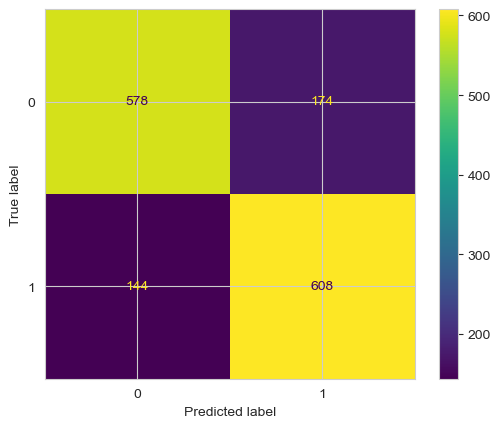

In [53]:
#Confusion metrix for the test 

Y_pred = pipe.predict(X_test_new)
accuracy = accuracy_score(Y_test_new, Y_pred) * 100
print("Accuracy on new test data: {:.2f}%".format(accuracy))

cm = confusion_matrix(Y_test_new, Y_pred)
TN, FP, FN, TP = cm.ravel()
print("TN={}, FP={}, FN={}, TP={}".format(TN, FP, FN, TP))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


### Accuracy, Precission and Recall

Accuracy (% of correct classification) = (𝑇𝑃+𝑇𝑁)/(𝑇𝑃+𝑇𝑁+𝐹𝑃+𝐹𝑁) 

Precision (% of correct positive predictions) = 𝑇𝑃/(𝑇𝑃+𝐹𝑃) 

Recall (% of actual positives predicted as positive) = 𝑇𝑃/(𝑇𝑃+𝐹𝑁)

Positive rate (% of positive predictions) = (𝑇𝑃+𝐹𝑃)/(𝑇𝑃+𝑇𝑁+𝐹𝑃+𝐹𝑁) 

#### Calculate the accuracy, precision and recall from the confusion matrix and Compare the calculated values with the results of the evaluation with the test data. 

In [54]:
cm = confusion_matrix(Y_test_new, Y_pred)
TN, FP, FN, TP = cm.ravel()

calculated_accuracy = ((TP+TN)/(TP+TN+FP+FN)*100)
formatted_accuracy = "%.2f" % calculated_accuracy

calculated_precision = ((TP)/(TP+FP)*100)
formatted_precision = "%.2f" % calculated_precision

calculated_recall = ((TP)/(TP+FN)*100)
formatted_recall = "%.2f" % calculated_recall

print("Accuracy on testing data = " + formatted_accuracy + "%")
print("Precision on testing data = "+ formatted_precision + "%")
print("Recall on testing data = "+ formatted_recall + "%")


Accuracy on testing data = 78.86%
Precision on testing data = 77.75%
Recall on testing data = 80.85%


In [55]:
# Generate classification report
report = classification_report(Y_test_new, Y_pred)
# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.80      0.77      0.78       752
           1       0.78      0.81      0.79       752

    accuracy                           0.79      1504
   macro avg       0.79      0.79      0.79      1504
weighted avg       0.79      0.79      0.79      1504



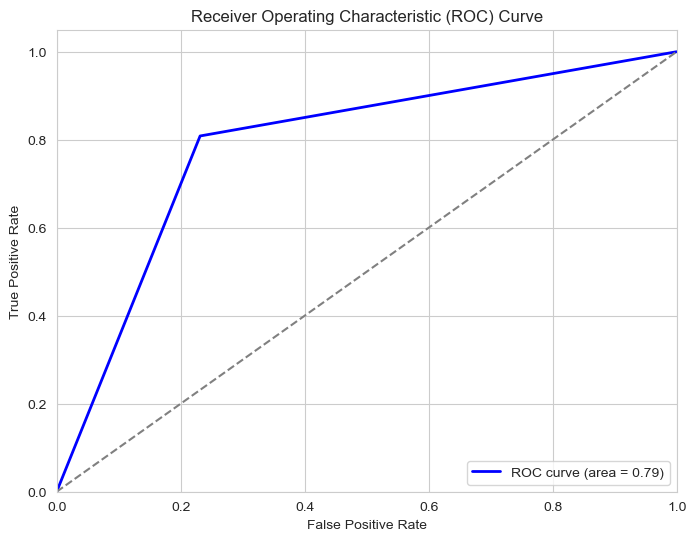

In [56]:
fpr, tpr, thresholds = roc_curve(Y_test_new, Y_pred)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [57]:
#Print the model accuracy For Logic Regression


score_LR = round(pipe.score(X_test_new,Y_test_new)*100,2)

print("The accuracy score achieved using Logic Regression is: "+str(score_LR)+" %")

The accuracy score achieved using Logic Regression is: 78.86 %


## Random Forest

In [58]:
#This is to trains a random forest model on my training data and then 
#uses that model to predict the labels of the test data

rf = RandomForestClassifier(n_estimators=100, random_state=0)

rf.fit(X_train_new, Y_train_new)

Y_pred_random_forest = rf.predict(X_test_new)
print(Y_pred_random_forest)

[0 0 0 ... 1 1 1]


#####  Random forest without limiting the  max depth

In [59]:
#Random forest with 100 trees

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_new, Y_train_new)

print("Accuracy on training set: {:.3f}".format(rf.score(X_train_new, Y_train_new)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test_new, Y_test_new)))

Accuracy on training set: 1.000
Accuracy on test set: 0.959


##### Random forest after limiting the max depth to 7

##### Justification

We need to reduce the max dept to help comutation timing and to prevent overfitting 

In [60]:
#Random forest with 100 tress
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=7)
rf.fit(X_train_new, Y_train_new)

train_accuracy_percentage = rf.score(X_train_new, Y_train_new) * 100
test_accuracy_percentage = rf.score(X_test_new, Y_test_new) * 100

print("Accuracy on training set: {:.2f}%".format(train_accuracy_percentage))
print("Accuracy on test set: {:.2f}%".format(test_accuracy_percentage))

Accuracy on training set: 89.25%
Accuracy on test set: 87.43%


### Confusion Metrix Random Forest

Accuracy on new test data: 87.43%
TN=613, FP=139, FN=50, TP=702


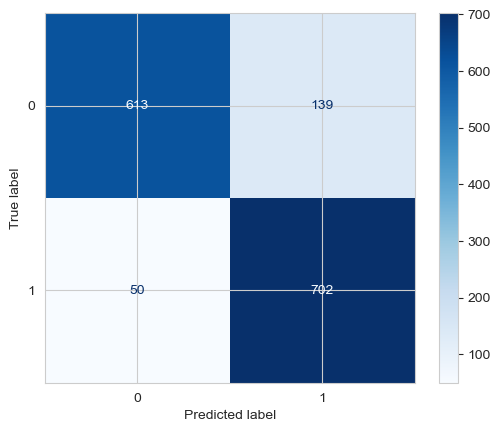

In [61]:
#Confusion metrix for the test 

Y_pred_random_forest = rf.predict(X_test_new)
accuracy = accuracy_score(Y_test_new, Y_pred_random_forest) * 100
print("Accuracy on new test data: {:.2f}%".format(accuracy))

cm = confusion_matrix(Y_test_new, Y_pred_random_forest)
TN, FP, FN, TP = cm.ravel()
print("TN={}, FP={}, FN={}, TP={}".format(TN, FP, FN, TP))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [62]:
cm = confusion_matrix(Y_test_new, Y_pred_random_forest)
TN, FP, FN, TP = cm.ravel()

calculated_accuracy = ((TP+TN)/(TP+TN+FP+FN)*100)
formatted_accuracy = "%.2f" % calculated_accuracy

calculated_precision = ((TP)/(TP+FP)*100)
formatted_precision = "%.2f" % calculated_precision

calculated_recall = ((TP)/(TP+FN)*100)
formatted_recall = "%.2f" % calculated_recall

print("Accuracy on testing data = " + formatted_accuracy + "%")
print("Precision on testing data = "+ formatted_precision + "%")
print("Recall on testing data = "+ formatted_recall + "%")

Accuracy on testing data = 87.43%
Precision on testing data = 83.47%
Recall on testing data = 93.35%


#### Classification Report Forest

In [63]:
# Generate classification report Random Forest
report = classification_report(Y_test_new, Y_pred_random_forest)
# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       752
           1       0.83      0.93      0.88       752

    accuracy                           0.87      1504
   macro avg       0.88      0.87      0.87      1504
weighted avg       0.88      0.87      0.87      1504



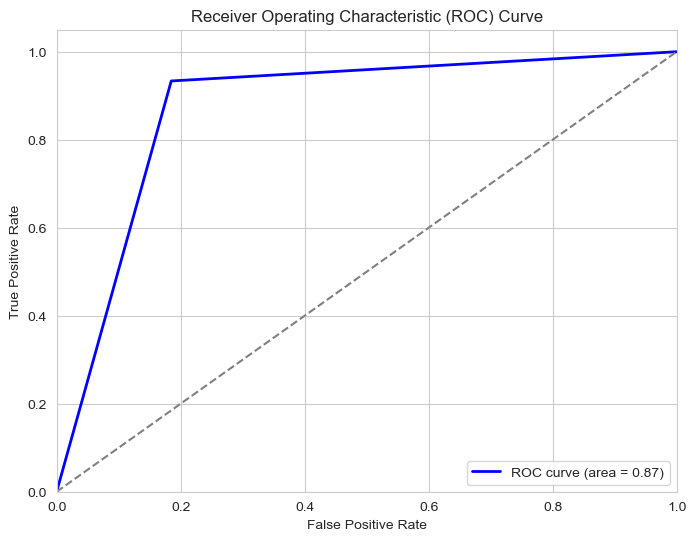

In [64]:
fpr, tpr, thresholds = roc_curve(Y_test_new, Y_pred_random_forest)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [65]:
#Print the model accuracy For Random Forest


score_RF = round(accuracy_score(Y_test_new, Y_pred_random_forest)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_RF)+" %")

The accuracy score achieved using Random Forest is: 87.43 %


## KNN (K Nearest Neighbors)

In [66]:
def model_trained(X_train_new, Y_train_new, X_test_new, Y_test_new, classifier, **kwargs):
    
    #This is to fit the chosen model and print out the score.
    
    # This instantiate model
    model = classifier(**kwargs)
    
    # This is to train model
    model.fit(X_train_new, Y_train_new)
    
    # Then check accuracy and print out the results
    fit_accuracy = model.score(X_train_new, Y_train_new)
    test_accuracy = model.score(X_test_new, Y_test_new)
    
    print(f"Accuracy of Trained set: {fit_accuracy:0.2%}")
    print(f"Accuracy of Test set: {test_accuracy:0.2%}")
    
    return model



In [67]:


knn = model_trained(X_train_new, Y_train_new, X_test_new, Y_test_new, KNeighborsClassifier, n_neighbors=7)

knn.fit(X_train_new, Y_train_new)

Y_pred_knn = knn.predict(X_test_new)
print(Y_pred_knn)

Accuracy of Trained set: 91.95%
Accuracy of Test set: 89.10%
[0 0 0 ... 1 1 1]


In [68]:
cm = confusion_matrix(Y_test_new, Y_pred_knn)
TN, FP, FN, TP = cm.ravel()

calculated_accuracy = ((TP+TN)/(TP+TN+FP+FN)*100)
formatted_accuracy = "%.2f" % calculated_accuracy

calculated_precision = ((TP)/(TP+FP)*100)
formatted_precision = "%.2f" % calculated_precision

calculated_recall = ((TP)/(TP+FN)*100)
formatted_recall = "%.2f" % calculated_recall

print("Accuracy on testing data = " + formatted_accuracy + "%")
print("Precision on testing data = "+ formatted_precision + "%")
print("Recall on testing data = "+ formatted_recall + "%")

Accuracy on testing data = 89.10%
Precision on testing data = 82.81%
Recall on testing data = 98.67%


Accuracy on new test data: 89.10%
TN=598, FP=154, FN=10, TP=742


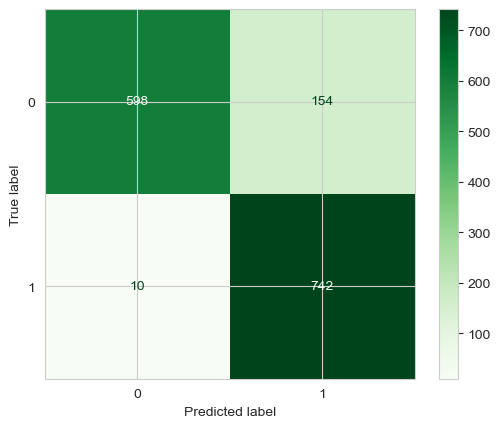

In [69]:
#Confusion metrix for the test 

Y_pred_knn = knn.predict(X_test_new)
accuracy = accuracy_score(Y_test_new, Y_pred_knn) * 100
print("Accuracy on new test data: {:.2f}%".format(accuracy))

cm = confusion_matrix(Y_test_new, Y_pred_knn)
TN, FP, FN, TP = cm.ravel()
print("TN={}, FP={}, FN={}, TP={}".format(TN, FP, FN, TP))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Greens)
plt.show()


#### Clasification Report

In [70]:
# Generate classification report KNN
report = classification_report(Y_test_new, Y_pred_knn)
# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.98      0.80      0.88       752
           1       0.83      0.99      0.90       752

    accuracy                           0.89      1504
   macro avg       0.91      0.89      0.89      1504
weighted avg       0.91      0.89      0.89      1504



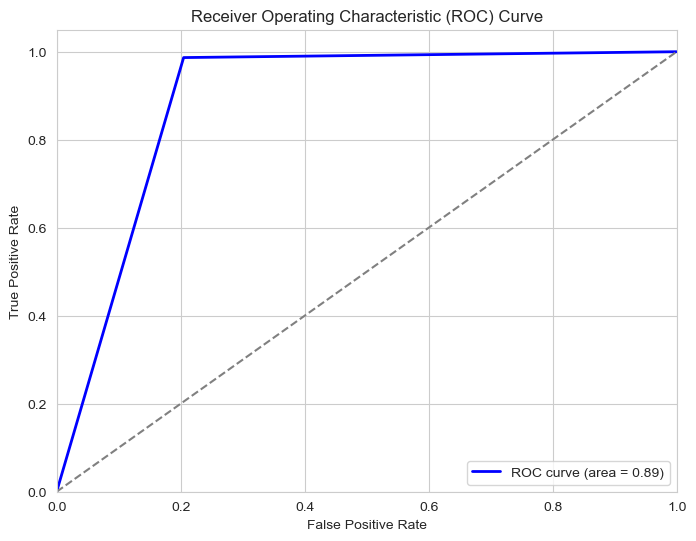

In [71]:
fpr, tpr, thresholds = roc_curve(Y_test_new, Y_pred_knn)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [72]:
#Print the model accuracy For K Nearest Neighbors


score_KNN = round(accuracy_score(Y_test_new, Y_pred_knn)*100,2)

print("The accuracy score achieved using K Nearest Neighbors is: "+str(score_KNN)+" %")

The accuracy score achieved using K Nearest Neighbors is: 89.1 %


## Naive Bayes

In [73]:
#This is to trains a Naive Bayes model on my training data and then 
#uses that model to predict the labels of the test data

naive_Bayes = model_trained(X_train_new, Y_train_new, X_test_new, Y_test_new, GaussianNB)

naive_Bayes.fit(X_train_new, Y_train_new)

Y_pred_naive_Bayes = naive_Bayes.predict(X_test_new)
print(Y_pred_naive_Bayes)

Accuracy of Trained set: 78.06%
Accuracy of Test set: 76.40%
[0 0 0 ... 1 1 0]


In [74]:
cm = confusion_matrix(Y_test_new, Y_pred_naive_Bayes)
TN, FP, FN, TP = cm.ravel()

calculated_accuracy = ((TP+TN)/(TP+TN+FP+FN)*100)
formatted_accuracy = "%.2f" % calculated_accuracy

calculated_precision = ((TP)/(TP+FP)*100)
formatted_precision = "%.2f" % calculated_precision

calculated_recall = ((TP)/(TP+FN)*100)
formatted_recall = "%.2f" % calculated_recall

print("Accuracy on testing data = " + formatted_accuracy + "%")
print("Precision on testing data = "+ formatted_precision + "%")
print("Recall on testing data = "+ formatted_recall + "%")

Accuracy on testing data = 76.40%
Precision on testing data = 79.06%
Recall on testing data = 71.81%


#### Confusion Metrix

Accuracy on new test data: 76.40%
TN=609, FP=143, FN=212, TP=540


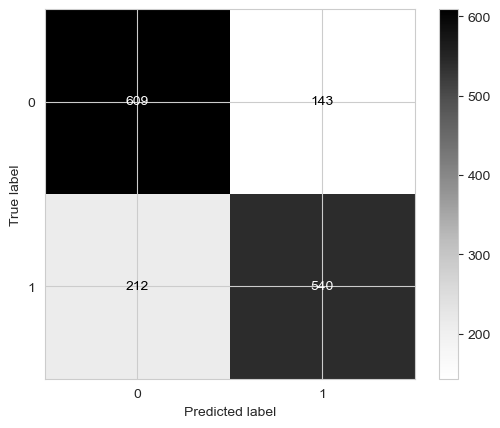

In [75]:
#Confusion metrix for the test 

Y_pred_naive_Bayes = naive_Bayes.predict(X_test_new)
accuracy = accuracy_score(Y_test_new, Y_pred_naive_Bayes) * 100
print("Accuracy on new test data: {:.2f}%".format(accuracy))

cm = confusion_matrix(Y_test_new, Y_pred_naive_Bayes)
TN, FP, FN, TP = cm.ravel()
print("TN={}, FP={}, FN={}, TP={}".format(TN, FP, FN, TP))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Greys)
plt.show()


##### Clasification Report

In [76]:
# Generate classification report Naive Bayes
report = classification_report(Y_test_new, Y_pred_naive_Bayes)
# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.74      0.81      0.77       752
           1       0.79      0.72      0.75       752

    accuracy                           0.76      1504
   macro avg       0.77      0.76      0.76      1504
weighted avg       0.77      0.76      0.76      1504



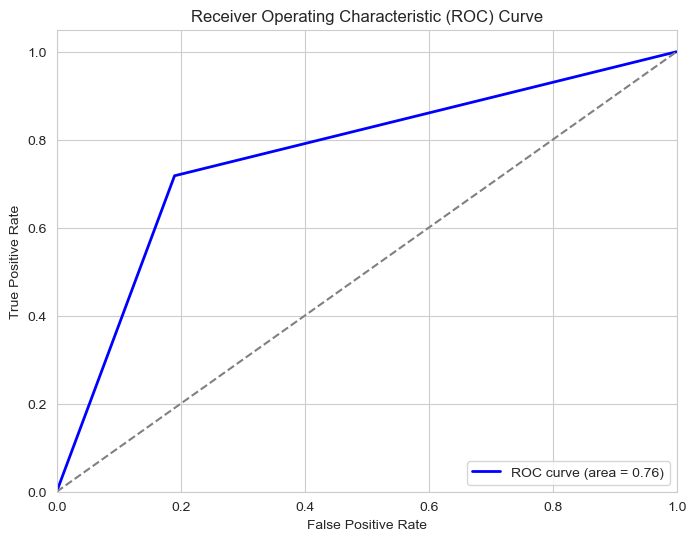

In [77]:
fpr, tpr, thresholds = roc_curve(Y_test_new, Y_pred_naive_Bayes)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [78]:
#Print the model accuracy For Naive Bayes


score_NB = round(accuracy_score(Y_test_new, Y_pred_naive_Bayes)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_NB)+" %")

The accuracy score achieved using Naive Bayes is: 76.4 %


## Decision Tree

In [79]:
#This is to trains a decision tree model on my training data and then 
#uses that model to predict the labels of the test data

decis_tree = model_trained(X_train_new, Y_train_new, X_test_new, Y_test_new, DecisionTreeClassifier, max_depth=3, random_state=0)

#decis_tree = DecisionTreeClassifier(max_depth=3, random_state=0)

decis_tree.fit(X_train_new, Y_train_new)

Y_pred_decis_tree = decis_tree.predict(X_test_new)
print(Y_pred_decis_tree)

Accuracy of Trained set: 80.59%
Accuracy of Test set: 80.25%
[0 0 0 ... 1 1 0]


In [80]:
cm = confusion_matrix(Y_test_new, Y_pred_decis_tree)
TN, FP, FN, TP = cm.ravel()

calculated_accuracy = ((TP+TN)/(TP+TN+FP+FN)*100)
formatted_accuracy = "%.2f" % calculated_accuracy

calculated_precision = ((TP)/(TP+FP)*100)
formatted_precision = "%.2f" % calculated_precision

calculated_recall = ((TP)/(TP+FN)*100)
formatted_recall = "%.2f" % calculated_recall

print("Accuracy on testing data = " + formatted_accuracy + "%")
print("Precision on testing data = "+ formatted_precision + "%")
print("Recall on testing data = "+ formatted_recall + "%")

Accuracy on testing data = 80.25%
Precision on testing data = 76.42%
Recall on testing data = 87.50%


##### Confusion metrix

Accuracy on new test data: 80.25%
TN=549, FP=203, FN=94, TP=658


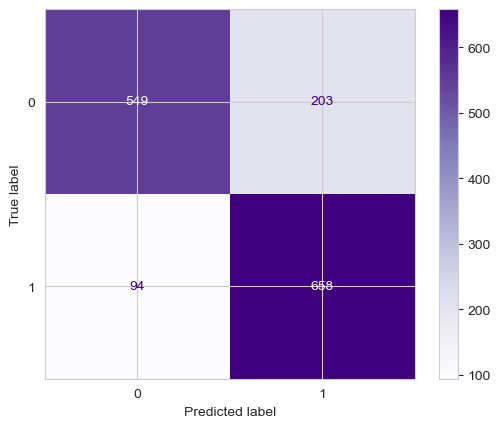

In [81]:
#Confusion metrix for the test 

Y_pred_decis_tree = decis_tree.predict(X_test_new)
accuracy = accuracy_score(Y_test_new, Y_pred_decis_tree) * 100
print("Accuracy on new test data: {:.2f}%".format(accuracy))

cm = confusion_matrix(Y_test_new, Y_pred_decis_tree)
TN, FP, FN, TP = cm.ravel()
print("TN={}, FP={}, FN={}, TP={}".format(TN, FP, FN, TP))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Purples)
plt.show()


In [82]:
# Generate classification report Decision Tree
report = classification_report(Y_test_new, Y_pred_decis_tree)
# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.85      0.73      0.79       752
           1       0.76      0.88      0.82       752

    accuracy                           0.80      1504
   macro avg       0.81      0.80      0.80      1504
weighted avg       0.81      0.80      0.80      1504



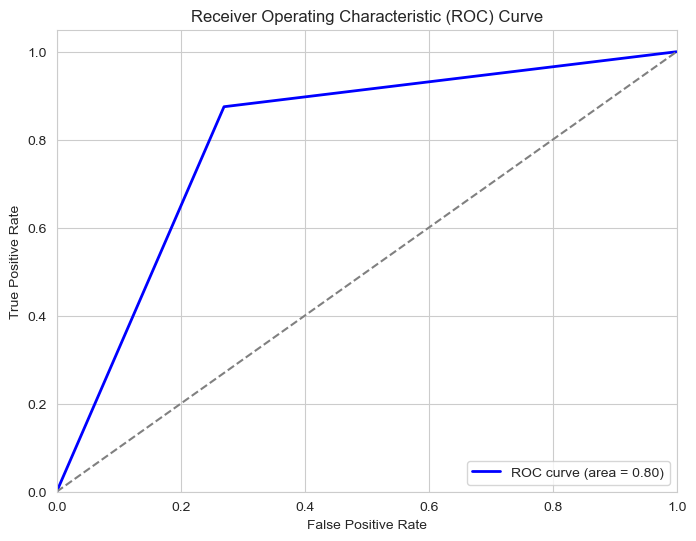

In [83]:
fpr, tpr, thresholds = roc_curve(Y_test_new, Y_pred_decis_tree)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [84]:
#Print the model accuracy For Decision Tree


score_DT = round(accuracy_score(Y_test_new, Y_pred_decis_tree)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_DT)+" %")

The accuracy score achieved using Decision Tree is: 80.25 %


## SVC

This is computationally expensive. It takes along processing time to load therefore i have to reduce the penalty for misclassification "c" so as to have a fast training time. Still, it is not as fast as the previous algorithm used.

In [85]:
#This is to trains a SVC model on my training data and then 
#uses that model to predict the labels of the test data

svc = SVC(C=200, class_weight={0: 1, 1: 20}, kernel='linear', degree=5)

svc.fit(X_train_new, Y_train_new)

# Use the trained model to predict labels for the test data
Y_pred_svc = svc.predict(X_test_new)

train_accuracy_percentage = svc.score(X_train_new, Y_train_new) * 100
test_accuracy_percentage = svc.score(X_test_new, Y_test_new) * 100

print("Accuracy on training set: {:.2f}%".format(train_accuracy_percentage))
print("Accuracy on test set: {:.2f}%".format(test_accuracy_percentage))

print(Y_pred_naive_Bayes)

Accuracy on training set: 64.98%
Accuracy on test set: 65.69%
[0 0 0 ... 1 1 0]


In [86]:
cm = confusion_matrix(Y_test_new, Y_pred_svc)
TN, FP, FN, TP = cm.ravel()

calculated_accuracy = ((TP+TN)/(TP+TN+FP+FN)*100)
formatted_accuracy = "%.2f" % calculated_accuracy

calculated_precision = ((TP)/(TP+FP)*100)
formatted_precision = "%.2f" % calculated_precision

calculated_recall = ((TP)/(TP+FN)*100)
formatted_recall = "%.2f" % calculated_recall

print("Accuracy on testing data = " + formatted_accuracy + "%")
print("Precision on testing data = "+ formatted_precision + "%")
print("Recall on testing data = "+ formatted_recall + "%")

Accuracy on testing data = 65.69%
Precision on testing data = 59.32%
Recall on testing data = 99.87%


##### Confusion metrix

Accuracy on new test data: 65.69%
TN=237, FP=515, FN=1, TP=751


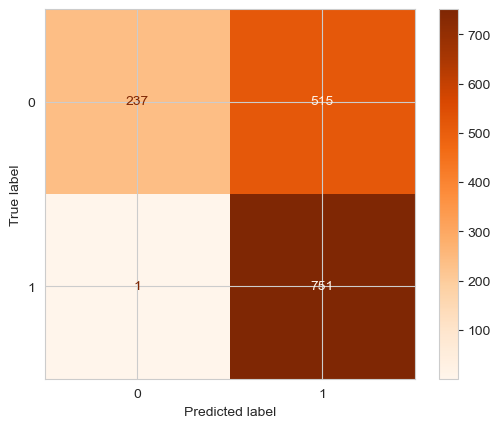

In [87]:
#Confusion metrix for the test 

Y_pred_svc = svc.predict(X_test_new)
accuracy = accuracy_score(Y_test_new, Y_pred_svc) * 100
print("Accuracy on new test data: {:.2f}%".format(accuracy))

cm = confusion_matrix(Y_test_new, Y_pred_svc)
TN, FP, FN, TP = cm.ravel()
print("TN={}, FP={}, FN={}, TP={}".format(TN, FP, FN, TP))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Oranges)
plt.show()


In [88]:
# Generate classification report SVC
report = classification_report(Y_test_new, Y_pred_svc)
# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       1.00      0.32      0.48       752
           1       0.59      1.00      0.74       752

    accuracy                           0.66      1504
   macro avg       0.79      0.66      0.61      1504
weighted avg       0.79      0.66      0.61      1504



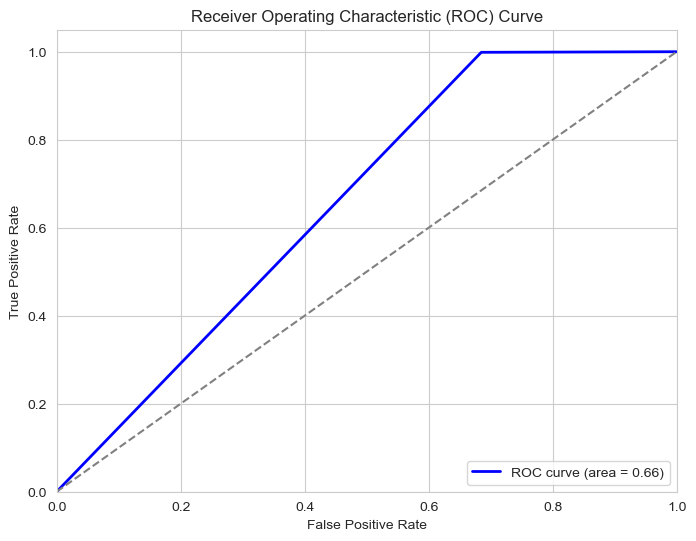

In [89]:
fpr, tpr, thresholds = roc_curve(Y_test_new, Y_pred_svc)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [90]:
#Print the model accuracy For Decision Tree


score_SVC = round(accuracy_score(Y_test_new, Y_pred_svc)*100,2)

print("The accuracy score achieved using SVC is: "+str(score_SVC)+"%")

The accuracy score achieved using SVC is: 65.69%


### Hyper Parameter Tunning

In [91]:

# Function to print scores in percentage
def print_scores(scores):
    return [f"{score*100:.2f}%" for score in scores]

#  Define hyperparameters for each algorithm
lr_params = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
knn_params = {'n_neighbors': [3, 5, 7]}
nb_params = {}
dt_params = {'max_depth': [None, 10, 20]}
svc_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf']}

# List of algorithms and their parameters
algorithms = [
    (LogisticRegression(), lr_params),
    (RandomForestClassifier(), rf_params),
    (KNeighborsClassifier(), knn_params),
    (GaussianNB(), nb_params),
    (DecisionTreeClassifier(), dt_params),
    (SVC(), svc_params)
]

# Perform hyperparameter tuning for each algorithm
for clf, params in algorithms:
    grid_search = GridSearchCV(clf, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train_new, Y_train_new)
    
    print(f"Best parameters for {clf.__class__.__name__}: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_*100:.2f}%")
    print()
    
    # Evaluate the best model on the test set
    best_model = grid_search.best_estimator_
    test_score = best_model.score(X_test_new, Y_test_new)
    print(f"Test set accuracy for {clf.__class__.__name__}: {test_score*100:.2f}%")
    print()

Best parameters for LogisticRegression: {'C': 1, 'penalty': 'l2'}
Best cross-validation score: 79.19%

Test set accuracy for LogisticRegression: 78.79%

Best parameters for RandomForestClassifier: {'max_depth': None, 'n_estimators': 100}
Best cross-validation score: 95.31%

Test set accuracy for RandomForestClassifier: 96.08%

Best parameters for KNeighborsClassifier: {'n_neighbors': 3}
Best cross-validation score: 91.74%

Test set accuracy for KNeighborsClassifier: 91.95%

Best parameters for GaussianNB: {}
Best cross-validation score: 78.09%

Test set accuracy for GaussianNB: 76.40%

Best parameters for DecisionTreeClassifier: {'max_depth': 20}
Best cross-validation score: 90.72%

Test set accuracy for DecisionTreeClassifier: 92.15%

Best parameters for SVC: {'C': 10, 'kernel': 'rbf'}
Best cross-validation score: 85.97%

Test set accuracy for SVC: 85.84%



## Comparism

In [92]:
# Algorithm names
All_algorithms = ["Logistic Regression", "Random Forest", "K-Nearest Neighbors", "Naive Bayes", "Decision Tree", "SVC"]

# Scores before tuning
scores_before_tuning = [score_LR, score_RF, score_KNN, score_NB, score_DT, score_SVC]

# Print scores before tuning
for algorithm, score in zip(All_algorithms, scores_before_tuning):
    print(f"Accuracy score before tuning for {algorithm}: {score:.2f}%")
print()
print()
print()
print()


# List to store scores after tuning for each algorithm
scores_after_tuning = []

# Perform hyperparameter tuning for each algorithm
for clf, params in algorithms:
    grid_search = GridSearchCV(clf, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train_new, Y_train_new)
    
    # Evaluate the best model on the test set
    best_model = grid_search.best_estimator_
    test_score = best_model.score(X_test_new, Y_test_new)
    
    # Store the test score after tuning
    scores_after_tuning.append(test_score)

    # Print the test set accuracy after tuning for the current algorithm
    print(f"Accuracy score after tunning for {clf.__class__.__name__}: {test_score*100:.2f}%")

Accuracy score before tuning for Logistic Regression: 78.86%
Accuracy score before tuning for Random Forest: 87.43%
Accuracy score before tuning for K-Nearest Neighbors: 89.10%
Accuracy score before tuning for Naive Bayes: 76.40%
Accuracy score before tuning for Decision Tree: 80.25%
Accuracy score before tuning for SVC: 65.69%




Accuracy score after tunning for LogisticRegression: 78.79%
Accuracy score after tunning for RandomForestClassifier: 95.88%
Accuracy score after tunning for KNeighborsClassifier: 91.95%
Accuracy score after tunning for GaussianNB: 76.40%
Accuracy score after tunning for DecisionTreeClassifier: 92.15%
Accuracy score after tunning for SVC: 85.84%


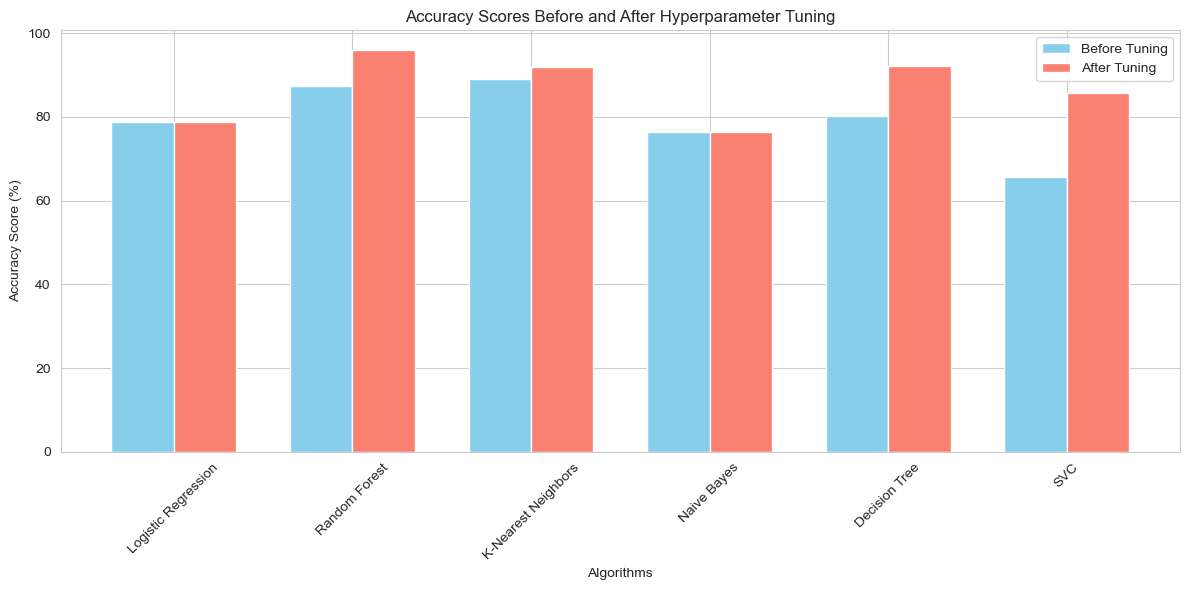

In [93]:
# Algorithm names
All_algorithms = ["Logistic Regression", "Random Forest", "K-Nearest Neighbors", "Naive Bayes", "Decision Tree", "SVC"]

# Scores before tuning
scores_before_tuning = [score_LR, score_RF, score_KNN, score_NB, score_DT, score_SVC]

# Multiply the scores after tuning by 100 to represent them as percentages
scores_after_tuning_percentage = [score * 100 for score in scores_after_tuning]

# This is to set the figure size
plt.figure(figsize=(12, 6))

# Create grouped bar plots for before and after tuning
bar_width = 0.35
index = range(len(All_algorithms))
plt.bar(index, scores_before_tuning, bar_width, color='skyblue', label='Before Tuning')
plt.bar([i + bar_width for i in index], scores_after_tuning_percentage, bar_width, color='salmon', label='After Tuning')

# Set labels for the axes and the title
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score (%)")
plt.title("Accuracy Scores Before and After Hyperparameter Tuning")
plt.xticks([i + bar_width / 2 for i in index], All_algorithms, rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

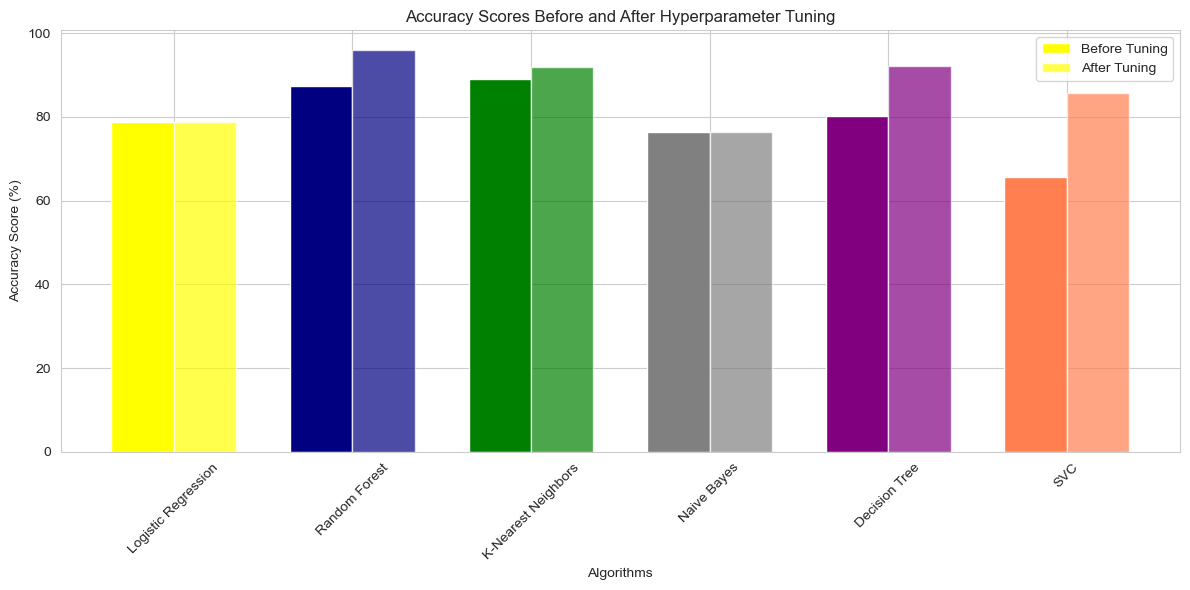

In [94]:
# Algorithm names
All_algorithms = ["Logistic Regression", "Random Forest", "K-Nearest Neighbors", "Naive Bayes", "Decision Tree", "SVC"]

# Scores before tuning
scores_before_tuning = [score_LR, score_RF, score_KNN, score_NB, score_DT, score_SVC]

# Multiply the scores after tuning by 100 to represent them as percentages
scores_after_tuning_percentage = [score * 100 for score in scores_after_tuning]

# Define colors for each algorithm
colors = ["yellow", "navy", "Green", "Grey", "Purple", "coral"]

# This is to set the figure size
plt.figure(figsize=(12, 6))

# Create grouped bar plots for before and after tuning with specified colors
bar_width = 0.35
index = range(len(All_algorithms))
plt.bar(index, scores_before_tuning, bar_width, color=colors, label='Before Tuning')
plt.bar([i + bar_width for i in index], scores_after_tuning_percentage, bar_width, color=colors, alpha=0.7, label='After Tuning')

# Set labels for the axes and the title
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score (%)")
plt.title("Accuracy Scores Before and After Hyperparameter Tuning")
plt.xticks([i + bar_width / 2 for i in index], All_algorithms, rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()